## Predict the Price of Laptops on Basis of Other Buying Factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# df.ScreenResolution.value_counts()

### Let's first deal with Data Types

In [5]:
# df.info()

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
def infd(x):
    d = pd.DataFrame(index=x.columns)
    d['null']= x.isnull().sum()
    d['unique']= x.nunique()
    d['datatype']=x.dtypes
    return d

In [8]:
infd(df)

,null,unique,datatype
Company,0,19,object
TypeName,0,6,object
Inches,0,18,float64
ScreenResolution,0,40,object
Cpu,0,118,object
Ram,0,9,object
Memory,0,39,object
Gpu,0,110,object
OpSys,0,9,object
Weight,0,179,object


In [9]:
df.shape

(1303, 11)

In [10]:
def cate(x):
    x = str(x)
    return int(x[:-2])

In [11]:
# df['ScreenResolution']= df['ScreenResolution'].apply(lambda x: cate(x))
# df['Cpu']= df['Cpu'].apply(lambda x: cate(x))
df['Ram']= df['Ram'].apply(lambda x: cate(x))


In [12]:
df['Ram'].nunique()

9

In [13]:
def cate(x):
    x = str(x)
    return float(x[:-2])

In [14]:
df['Weight']= df['Weight'].apply(lambda x: cate(x))

In [15]:
df['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [16]:
infd(df)

,null,unique,datatype
Company,0,19,object
TypeName,0,6,object
Inches,0,18,float64
ScreenResolution,0,40,object
Cpu,0,118,object
Ram,0,9,int64
Memory,0,39,object
Gpu,0,110,object
OpSys,0,9,object
Weight,0,171,float64


### Missing Values

No Missing values in any Feature. Hence moving to Duplicate Values

### Duplicate Values

In [17]:
df.duplicated().sum()

np.int64(29)

In [18]:
str(df['Ram'].dtype)

'int64'

<Axes: xlabel='Ram', ylabel='Density'>

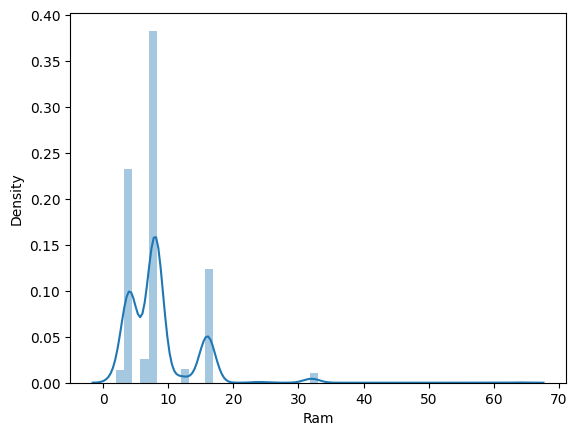

In [19]:
# for i in list(df.columns):
#     if str(df[i].dtype) != 'object':
#         sns.distplot(df[i]
sns.distplot(df['Ram'])

## Outliers

In [20]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


<Axes: xlabel='Inches'>

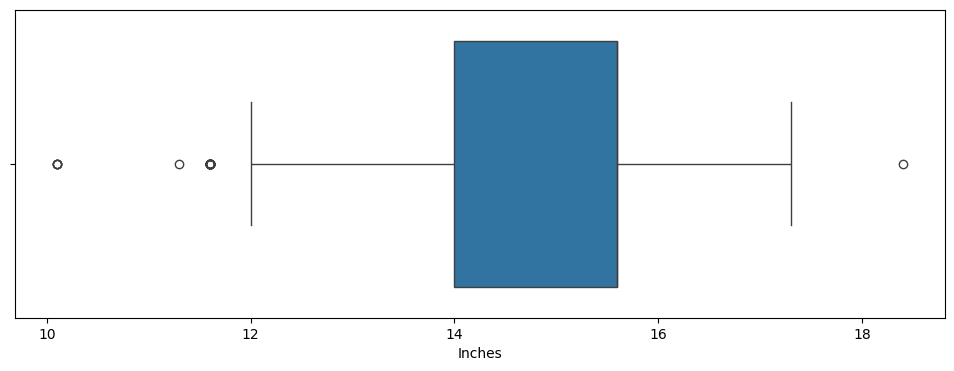

In [21]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['Inches'])

<Axes: xlabel='Ram'>

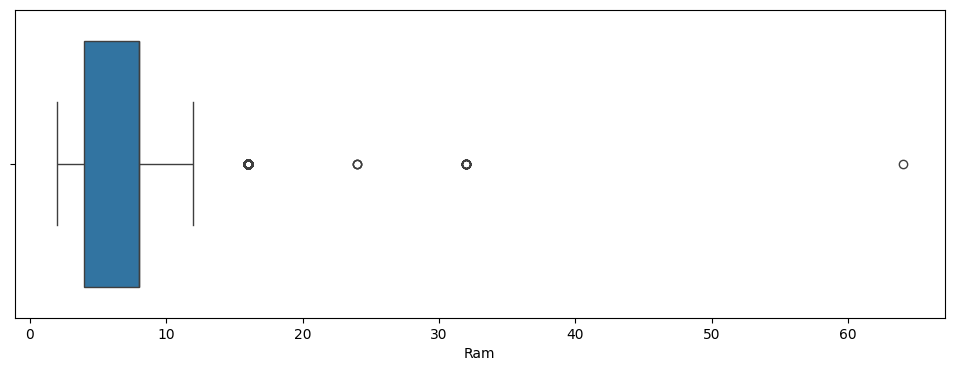

In [22]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['Ram'])

<Axes: xlabel='Weight'>

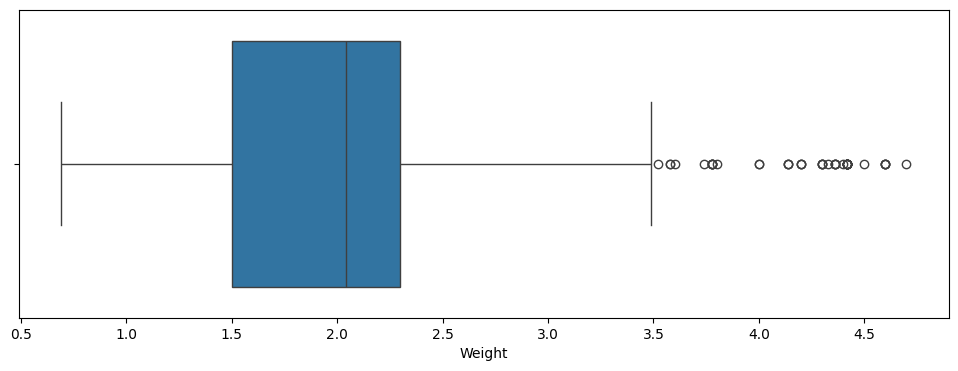

In [23]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['Weight'])

In [24]:
q3=df['Weight'].quantile(0.75)
q1=df['Weight'].quantile(0.25)
iqr=q3-q1

In [25]:
upp_lim = float(q3 + (1.5*iqr))
low_lim = float(q1 - (1.5*iqr))
print(upp_lim , low_lim)

3.4999999999999996 0.30000000000000027


In [26]:
df[(df['Weight']> upp_lim) | (df['Weight']< low_lim)].head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
177,MSI,Gaming,18.4,Full HD 1920x1080,Intel Core i7 6920HQ 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.40,149130.7200
224,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,130873.7952
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,207259.2000
247,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.60,159786.7200


- Since Here Outliers theirself telling information about data. Not removing outliers.

## Feature Cleaning

### CPU Feature

In [27]:
df['Cpu'].nunique()

118

In [28]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [29]:
def func(x):
    li = x.split()
    return " ".join(li[:3])

In [30]:
df['Cpu_en'] = df['Cpu'].apply(lambda x: func(x))

In [31]:
# df['Cpu_en'].unique()

In [32]:
def cpfunc(x):
    if x=='Intel Core i5' or x=='Intel Core i3' or x=='Intel Core i7':
        return x
    if x.split()[0]=='Intel':
        return 'Intel Processor'
    else:
        return 'AMD Processor'

In [33]:
df['Cpu_en']= df['Cpu_en'].apply(lambda x: cpfunc(x))

In [34]:
df['Cpu']=df['Cpu_en']

In [35]:
df.drop(columns='Cpu_en', inplace=True)

In [36]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [37]:
##GPU Feature

In [38]:
df['Gpu_en'] = df['Gpu'].apply(lambda x: " ".join(x.split()[:3]))

In [39]:
def gpfunc(x):
    if x=='Intel HD Graphics' or x=='Nvidia GeForce GTX':
        return x
    else:
        li = x.split()
        return str(li[0])

In [40]:
df['Gpu_en'] = df['Gpu_en'].apply(lambda x: gpfunc(x))

In [41]:
df['Gpu']= df['Gpu_en']

In [42]:
df.drop(columns='Gpu_en', inplace=True)

In [43]:
df['Gpu'].unique()

array(['Intel', 'Intel HD Graphics', 'AMD', 'Nvidia',
       'Nvidia GeForce GTX', 'ARM'], dtype=object)

In [44]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics,No OS,1.86,30636.0000


In [45]:
## Memory

In [46]:
df['Memory']= df['Memory'].str.replace('GB','')
df['Memory']= df['Memory'].str.replace('.0TB','000')
df['Memory']= df['Memory'].str.replace('TB','000')

In [47]:
df['Memory'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [48]:
def memfunc(x):
    if '+' in x:
        x= x.replace('+','')
        if x.split()[1]==x.split()[3]:
            z=int(x.split()[0]) + int(x.split()[2]) 
            return str(z)+' '+x.split()[1]
        else:
            return x
    else:
        return x

In [49]:
df['meme']= df['Memory'].apply(lambda x: memfunc(x)) 

In [50]:
# df.meme.unique()

In [51]:
df= df[~(df['meme']=='512 SSD   2000 HDD') & ~(df['meme']=='1000 SSD   1000 HDD') & ~(df['meme']=='256 SSD   500 HDD') & ~(df['meme']=='128 SSD   2000 HDD') & ~(df['meme']=='64 Flash Storage   1000 HDD') & ~(df['meme']=='512 SSD   1000 Hybrid') & ~(df['meme']=='256 SSD   1000 Hybrid')]

In [52]:
df.meme.unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD   1000 HDD', '64 Flash Storage', '256 SSD   1000 HDD',
       '256 SSD   2000 HDD', '32 SSD', '2000 HDD', '64 SSD',
       '1000 Hybrid', '512 SSD   1000 HDD', '1000 SSD', '1024 SSD',
       '16 SSD', '16 Flash Storage', '768 SSD', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [53]:
def hdd_fun(x):
    # if 'HDD' and 'SSD' in x:
    #     return 0
    if 'HDD' in x:
        return int(''.join(char for char in x if char.isdigit()))
    else:
        return 0
        
def ssd_fun(x):
    # if 'HDD' and 'SSD' in x:
    #     return 0
    if 'SSD' in x:
        return int(''.join(char for char in x if char.isdigit()))
    else:
        return 0

def hybrid_fun(x):
    if 'Hybrid' in x:
        return int(''.join(char for char in x if char.isdigit()))
    else:
        return 0

def flash_fun(x):
    if 'Flash Storage' in x:
        return int(''.join(char for char in x if char.isdigit()))
    else:
        return 0

def hdd_f(x):
    x= list(str(x))
    if len(x)>4:
        return int(''.join(x[-4:]))
    else:
        return int(''.join(x))

def ssd_f(x):
    x= list(str(x))
    if len(x)>4:
        return int(''.join(x[:3]))
    else:
        return int(''.join(x))

In [54]:
df['SSD'] = df['meme'].apply(lambda x: ssd_fun(x))
df['HDD'] = df['meme'].apply(lambda x: hdd_fun(x))
df['Flash Storage'] = df['meme'].apply(lambda x: flash_fun(x))
df['Hybrid'] = df['meme'].apply(lambda x: hybrid_fun(x))
df['HDD']= df['HDD'].apply(lambda x: hdd_f(x))
df['SSD']= df['SSD'].apply(lambda x: ssd_f(x))

In [55]:
df.HDD.value_counts()

HDD
0       725
1000    405
500     132
2000     27
32        1
128       1
Name: count, dtype: int64

In [56]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,meme,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128 SSD,Intel,macOS,1.37,71378.6832,128 SSD,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128 Flash Storage,Intel HD Graphics,macOS,1.34,47895.5232,128 Flash Storage,0,0,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel HD Graphics,No OS,1.86,30636.0000,256 SSD,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512 SSD,AMD,macOS,1.83,135195.3360,512 SSD,512,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256 SSD,Intel,macOS,1.37,96095.8080,256 SSD,256,0,0,0


In [57]:
df.drop(['Memory','meme'], inplace=True, axis=1)

In [58]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,Intel,macOS,1.37,71378.6832,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,Intel HD Graphics,macOS,1.34,47895.5232,0,0,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,Intel HD Graphics,No OS,1.86,30636.0000,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,AMD,macOS,1.83,135195.3360,512,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,Intel,macOS,1.37,96095.8080,256,0,0,0


In [59]:
##Screen Resolution

In [60]:
def Xres_func(x):
    num = x.split('x')
    return (int(''.join(char for char in num[0] if char.isdigit())))

def Yres_func(x):
    num = x.split('x')
    return int(num[1])

In [61]:
df['xres'] = df['ScreenResolution'].apply(lambda x: Xres_func(x))
df['yres'] = df['ScreenResolution'].apply(lambda x: Yres_func(x))

In [62]:
df.HDD.unique()

array([   0,  500, 1000, 2000,   32,  128])

- Higher PPI means:

- Sharper image: More pixels packed into a smaller area result in a crisper and more detailed image.
- Better text clarity: Smaller text appears clearer and more readable.
- More vibrant colors: The increased pixel density allows for a wider range of colors and better color accuracy.

  
Factors affecting PPI:

- Screen size: Larger screens can accommodate more pixels, leading to higher PPI.
- Pixel count: The total number of pixels in the display determines the PPI.
- Screen resolution: This is often expressed as width x height (e.g., 1920x1080).

In [63]:
df['ppi'] = (((df['xres']**2) + (df['yres']**2))**0.5/df['Inches']).astype('float')

In [64]:
df.drop(['Inches','xres','yres','ScreenResolution'], inplace=True, axis=1)

In [65]:
df.head(3)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,71378.6832,128,0,0,0,226.983005
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics,macOS,1.34,47895.5232,0,0,128,0,127.677940
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics,No OS,1.86,30636.0000,256,0,0,0,141.211998


## Exploratory Data Analysis

#### Univariate

In Our Data, Dell and Lenovo has the higher distribution. HP has the least weightage.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

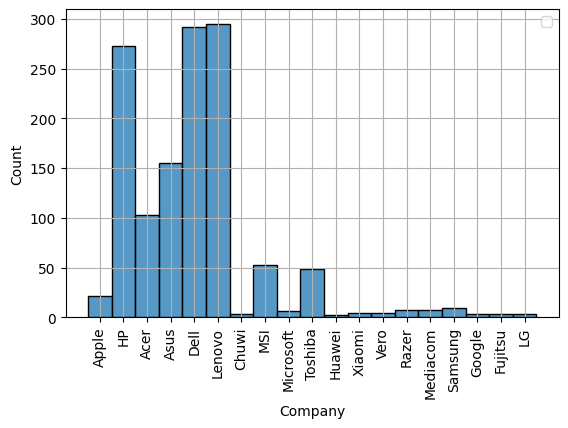

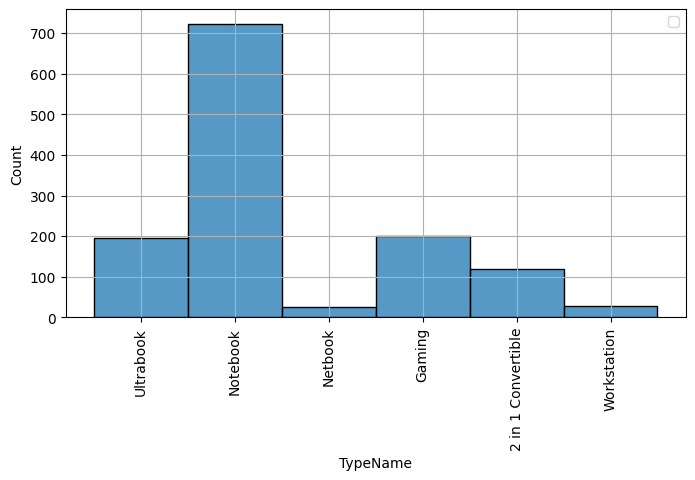

In [66]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['Company'])
plt.legend()
plt.grid()
plt.xticks(rotation=90)

plt.subplot(1,2,1)
plt.figure(figsize=(8,4))
sns.histplot(df['TypeName'])
plt.legend()
plt.grid()
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of O.S over Data')

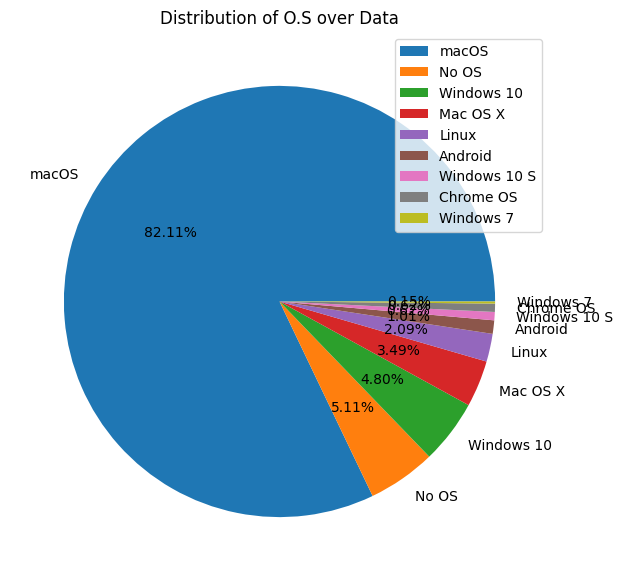

In [67]:
# df['OpSys'].nunique()
plt.figure(figsize=(12,7))
listt= list(df['OpSys'].unique())

plt.pie(df['OpSys'].value_counts(),autopct='%.2f%%', labels= listt)
plt.legend()
plt.title('Distribution of O.S over Data')

In our data MacOs OpSys has the highest weightage. 

(array([421.,   0., 518.,   0.,   0.,  63.,   0., 136.,   0., 153.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

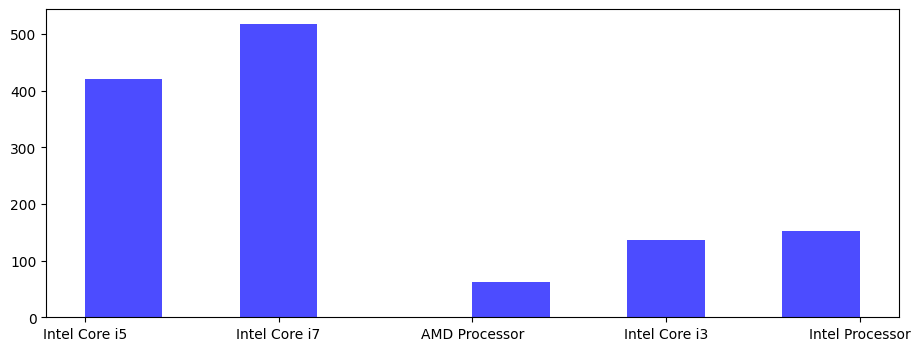

In [68]:
plt.figure(figsize=(11,4))
plt.hist(df['Cpu'], color='blue', alpha=0.7)

- We have high Distribution of Intel Core i7 and Intel Core i5 Processor.

(array([ 83.,   0., 638.,   0., 178.,   0., 163.,   0., 228.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

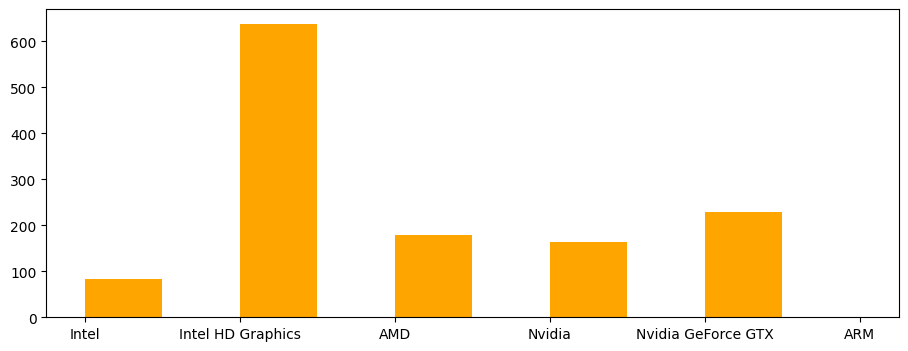

In [69]:
plt.figure(figsize=(11,4))
plt.hist(df['Gpu'], color='orange')

- Intel HD Graphics have the highest distribution in our data set while ARM gpu distribution is lowest

### Bivariate & Mulitvariate

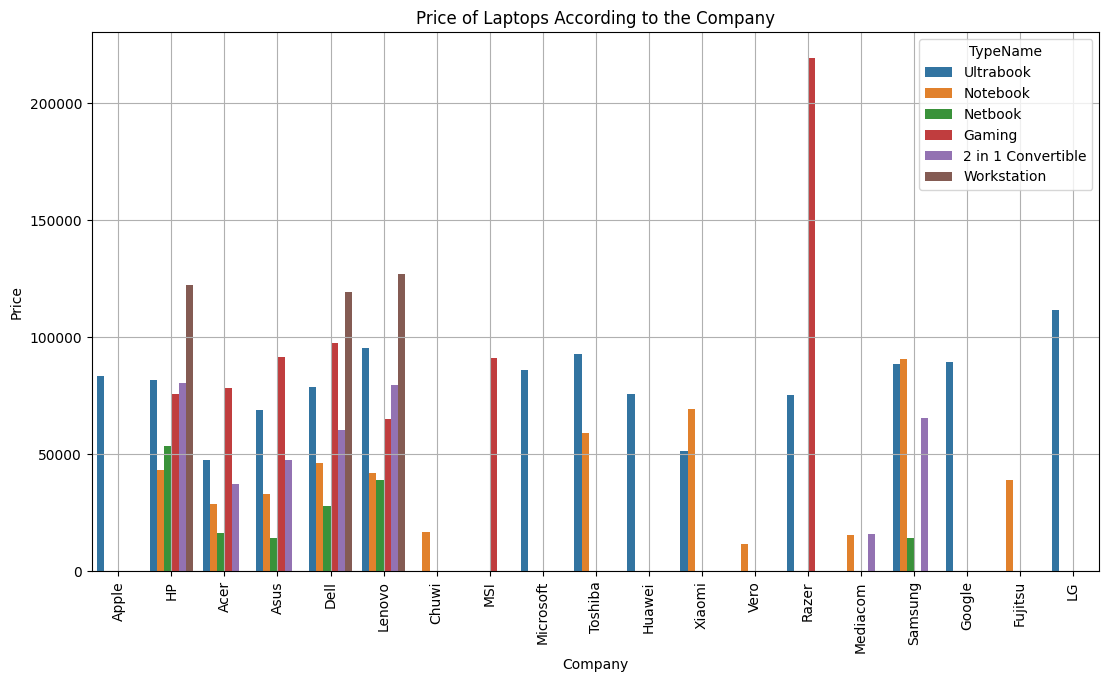

In [70]:


plt.figure(figsize=(13,7))
sns.barplot(x='Company',y= 'Price', data=df, hue='TypeName',ci=None)
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Price of Laptops According to the Company')
plt.grid()

- Razer is the Company having Highest Price Gaming Laptops Mainly. It can be because of distribution also. 
- Vero is the Company having Cheapest Laptops & they basically make Notebooks only.
- Apple is having Ultrabooks.
- HP, Dell, Lenovo are the companies making all types of listed Laptops.

In [71]:
# df.drop(columns=['level_0'], axis=1, inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,71378.6832,128,0,0,0,226.983005
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics,macOS,1.34,47895.5232,0,0,128,0,127.677940
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics,No OS,1.86,30636.0000,256,0,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16,AMD,macOS,1.83,135195.3360,512,0,0,0,220.534624
4,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,96095.8080,256,0,0,0,226.983005


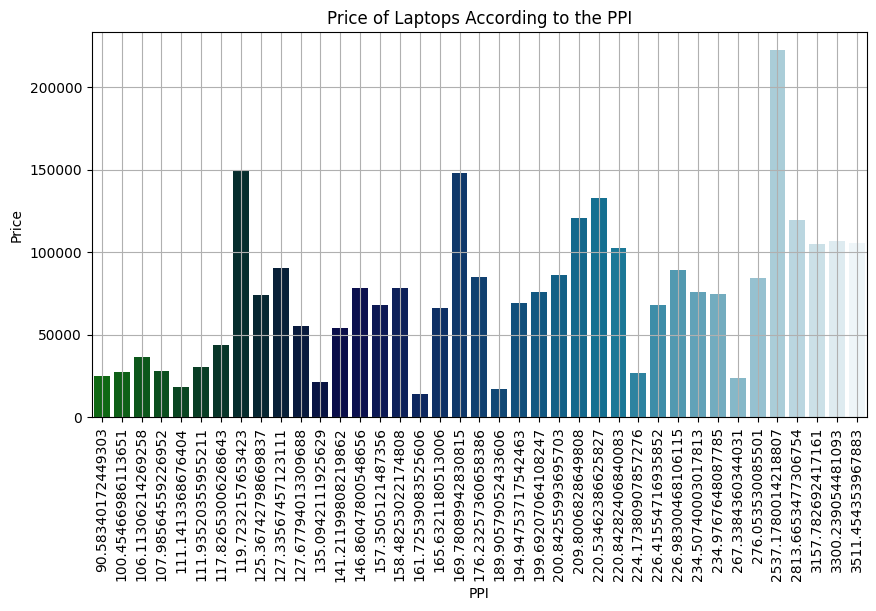

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x='ppi', y='Price',data=df, palette='ocean', ci=None)
plt.xticks(rotation=90)
plt.xlabel('PPI')
plt.ylabel('Price')
plt.title('Price of Laptops According to the PPI')
plt.grid()

- there is no particular pattern to observe b/w Price and PPI of Laptops.

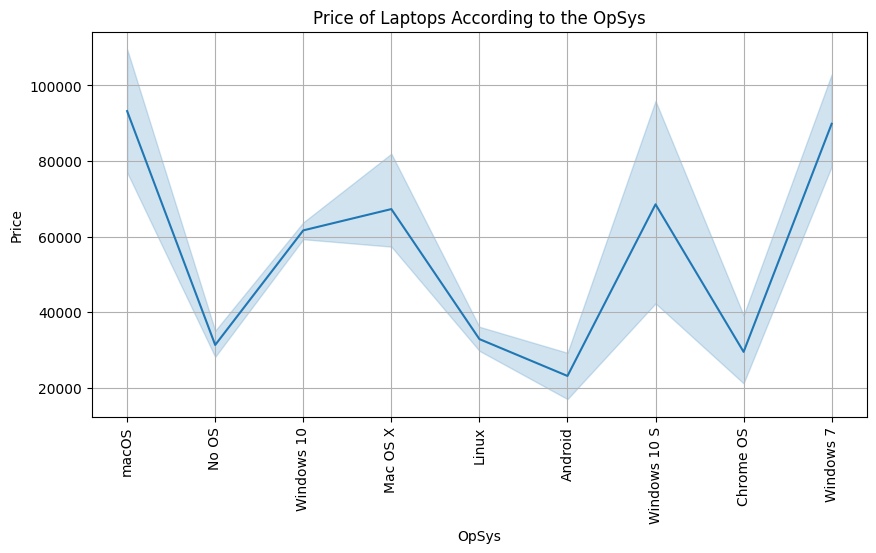

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(x='OpSys', y='Price', data=df)
plt.xticks(rotation=90)
plt.xlabel('OpSys')
plt.ylabel('Price')
plt.title('Price of Laptops According to the OpSys')
plt.grid()

- MacOS, MacOS X, Windows 7 have the very high Price Laptops.
- Android & Chrome OS Laptops are the lowest Price Laptops.

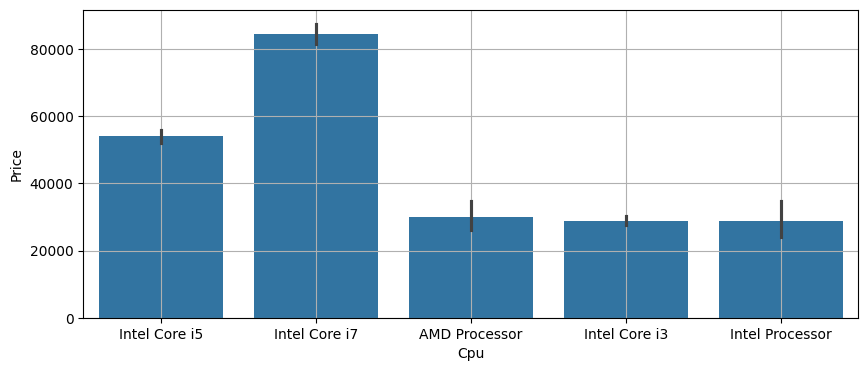

In [74]:
plt.figure(figsize=(10,4))
sns.barplot(x='Cpu', y='Price', data=df)
plt.grid()

- Intel Core i7 and Intel Core i5 have also high Price Laptops.

Text(0.5, 1.0, 'Price of Laptop According to their Weights')

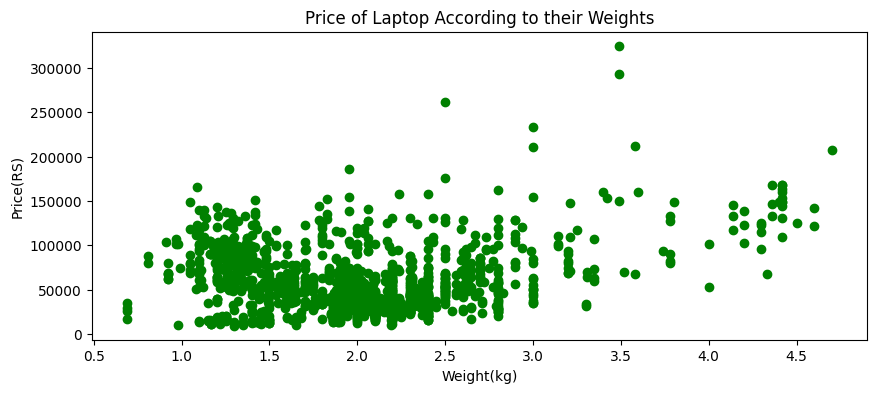

In [75]:
plt.figure(figsize=(10,4))
plt.scatter(df['Weight'], df['Price'], color='green')
plt.xlabel('Weight(kg)')
plt.ylabel('Price(RS)')
plt.title('Price of Laptop According to their Weights')

- The Laptops are mostly between range of 1 and 3kg Weight scale. Their Price Range is also low in this weight scale.
- On Avg, More the weight more the price is. But with too Much weight again cost cutting happens.

In [76]:
df.head(2)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,71378.6832,128,0,0,0,226.983005
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics,macOS,1.34,47895.5232,0,0,128,0,127.677940


<Axes: >

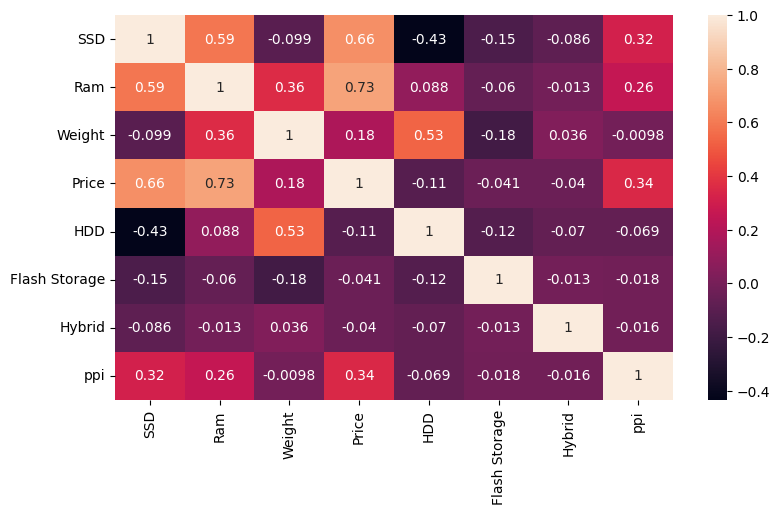

In [77]:
df1 = df[['SSD', 'Ram', 'Weight', 'Price','HDD','Flash Storage','Hybrid','ppi']].corr()
plt.figure(figsize=(9,5))
sns.heatmap(df1, annot=True)

- PPI have a -ive relation with Weight of Laptops
- Hybrid and FlashStorage have -ive corelation with all other features. They have -ive corelation with Price Feature too. We can remove them.
- Both SSD/HDD have +ive relation with Ram and Weight of Laptop. More the SSD/HDD more will be RAM and weight of Laptops.
- Price have very high +ive relation with RAM of Laptops.

In [78]:
df.drop(['Flash Storage', 'Hybrid'], axis=1, inplace=True)

In [79]:
df.head(2)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,71378.6832,128,0,226.983005
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics,macOS,1.34,47895.5232,0,0,127.677940


In [80]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [81]:
df['os'] = df['OpSys'].apply(cat_os)

In [82]:
df.drop(columns=['OpSys'],inplace=True)

## Feature Engineering

In [83]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Feature Transformation

In [84]:
import statsmodels.api as sm 
import pylab as py 

In [85]:
# g = sns.FacetGrid(df, col='Price', sharey=False)
# g.map(sns.distplot, 'Price', kde=True)
# g.map(sm.qqplot, 'Price')
# plt.show()
# plt.subplot(1,2,1)
# sns.distplot(df['Price'])

# plt.subplot(2,2,2)
# sm.qqplot(df['Price'], line='45')
# sns.distplot(df['Price'])


In [86]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'Weight', 'Price', 'SSD',
       'HDD', 'ppi', 'os'],
      dtype='object')

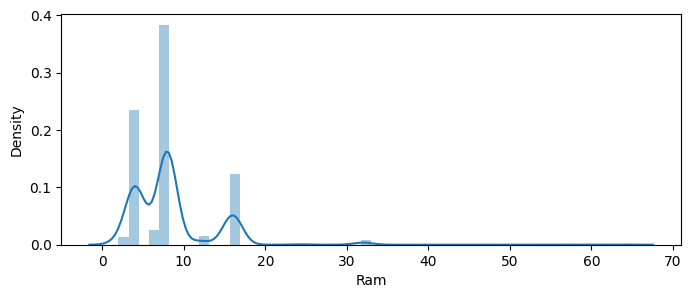

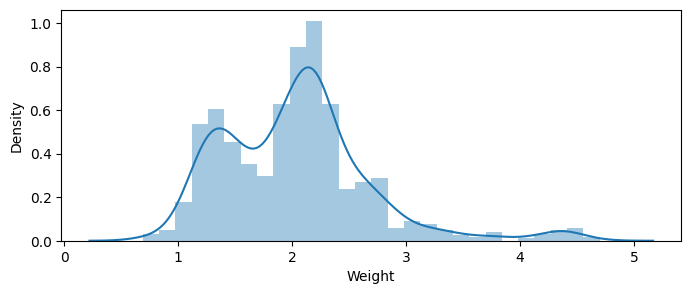

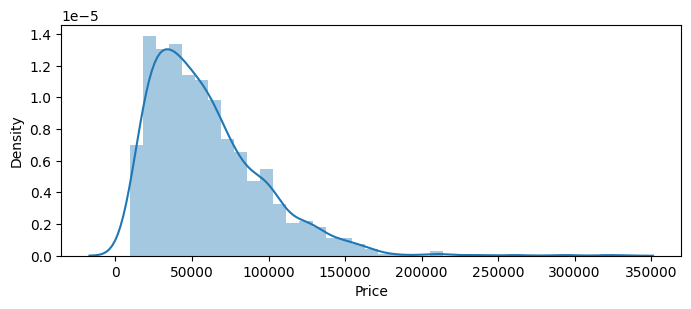

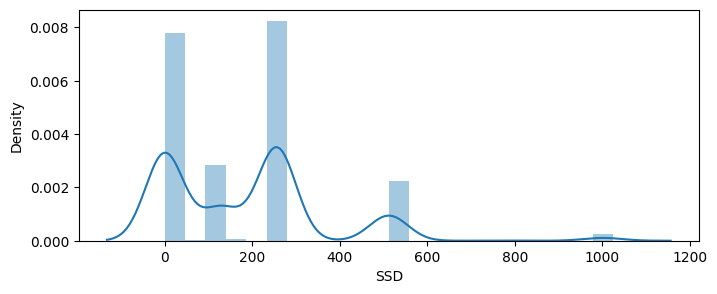

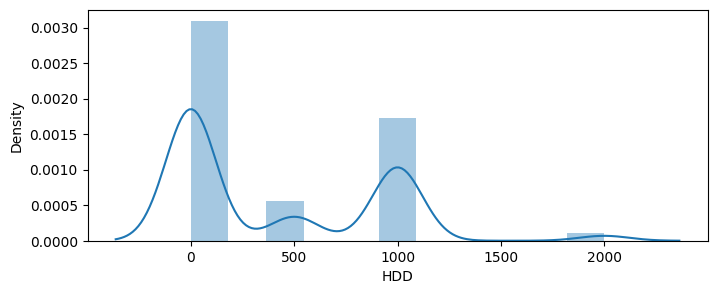

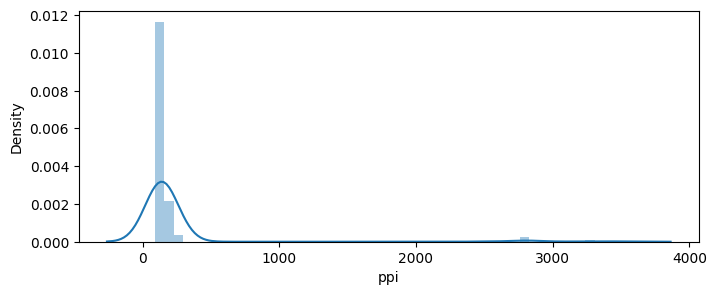

In [87]:
for i in ['Ram','Weight', 'Price','SSD', 'HDD', 'ppi']:
    plt.figure(figsize=(8,3))
    sns.distplot(df[i])

In [88]:
df.Ram.unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

In [89]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,Weight,Price,SSD,HDD,ppi,os
0,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,71378.6832,128,0,226.983005,Mac
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics,1.34,47895.5232,0,0,127.677940,Mac
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics,1.86,30636.0000,256,0,141.211998,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7,16,AMD,1.83,135195.3360,512,0,220.534624,Mac
4,Apple,Ultrabook,Intel Core i5,8,Intel,1.37,96095.8080,256,0,226.983005,Mac


In [90]:
# df.to_excel('output.xlsx', index=False)
df.to_csv('output1.csv', index=False)


### Just for Test Purpose. I have tried Feature Engineering and ML Models here.

In [91]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'Weight', 'Price', 'SSD',
       'HDD', 'ppi', 'os'],
      dtype='object')

In [92]:
x= df.drop(columns=['Price'])
y= np.log(df['Price'])

x['Ram']= round(np.log(x['Ram']),2)
x['ppi']= round(np.log(x['ppi']),2 )

In [93]:
x.head()

,Company,TypeName,Cpu,Ram,Gpu,Weight,SSD,HDD,ppi,os
0,Apple,Ultrabook,Intel Core i5,2.08,Intel,1.37,128,0,5.42,Mac
1,Apple,Ultrabook,Intel Core i5,2.08,Intel HD Graphics,1.34,0,0,4.85,Mac
2,HP,Notebook,Intel Core i5,2.08,Intel HD Graphics,1.86,256,0,4.95,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7,2.77,AMD,1.83,512,0,5.40,Mac
4,Apple,Ultrabook,Intel Core i5,2.08,Intel,1.37,256,0,5.42,Mac


In [95]:
x1=pd.get_dummies(x[['Company','TypeName', 'Cpu','Gpu','os']], drop_first=True, dtype=float, prefix='')
x1.columns = x1.columns.str.lstrip('_')
x = pd.concat([x, x1], axis=1)
x.drop(['Company', 'TypeName', 'Cpu','Gpu','os'], axis=1, inplace=True)

In [97]:
x.head()

,Ram,Weight,SSD,HDD,ppi,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel Core i5,Intel Core i7,Intel Processor,ARM,Intel,Intel HD Graphics,Nvidia,Nvidia GeForce GTX,Others/No OS/Linux,Windows
0,2.08,1.37,128,0,5.42,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.08,1.34,0,0,4.85,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.08,1.86,256,0,4.95,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.77,1.83,512,0,5.40,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.08,1.37,256,0,5.42,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:
y.shape

(1291,)

### Train Test Split

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=2)

## Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [101]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.819370387513891
MAE 0.21502435967566208


## Lasso Regression

In [102]:
# from sklearn.linear_model import Lasso
# ls = Lasso(alpha=0.001)

# ls.fit(x_train, y_train)
# y_pred = ls.predict(x_test)

# print('R2', r2_score(y_test, y_pred))
# print('MAE', mean_absolute_error(y_test, y_pred))

## Ridge Regression

In [103]:
# from sklearn.linear_model import Ridge
# rg = Ridge(alpha=0.01)

# rg.fit(x_train, y_train)
# y_pred = rg.predict(x_test)

# print('R2', r2_score(y_test, y_pred))
# print('MAE', mean_absolute_error(y_test, y_pred))

In [111]:
# for i in x.columns:
#     print(x[i].unique())